# Analysis of Westbound Traffic on the I-94 Interstate Highway

This project will analyze a dataset about the westbound traffic on the I-94 Interstate highway. The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station.

The variables in the dataset are:

* holiday (Categorical) : US National holidays plus regional holiday, Minnesota State Fair
* temp (Numeric) : Average temp in kelvin
* rain_1h (Numeric) : Amount in mm of rain that occurred in the hour
* snow_1h (Numeric) : Amount in mm of snow that occurred in the hour
* clouds_all (Numeric) : Percentage of cloud cover
* weather_main (Categorical) : Short textual description of the current weather
* weather_description (Categorical) : Longer textual description of the current weather
* date_time (DateTime) : Hour of the data collected in local CST time
* traffic_volume (Numeric) : Hourly I-94 ATR 301 reported westbound traffic volume

In [1]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [2]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


### Analyzing Traffic Volume

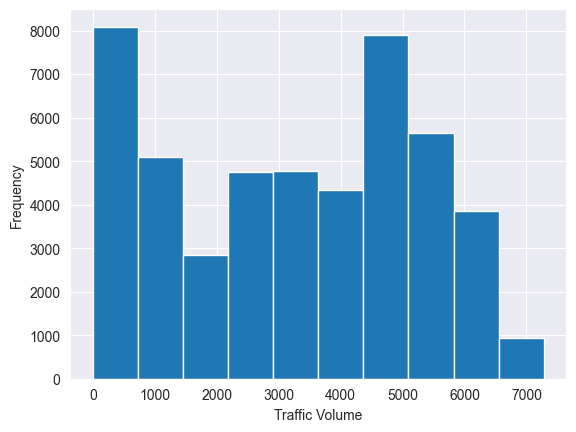

In [4]:
traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.show()

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From initial analysis, about 25% of the time, traffic volumes ranged under the 1200 car range and about 75% of the time, they ranged in excess of 4900 cars. This may reflect the effect of time on traffic volume. We will analyze the dataset further to understand the frequency distribution.

### Traffic Volume: Day vs. Night
We will compare daytime and nighttime data. We start by dividing the dataset into 2 parts:
* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

We will isolate daytime and nighttime data and plot histograms for the traffic volume against each data.

In [6]:
# Convert 'date_time' column to datetime format
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

# Isolate the daytime and nightime data
traffic_day = traffic.loc[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]

traffic_night = traffic.loc[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]

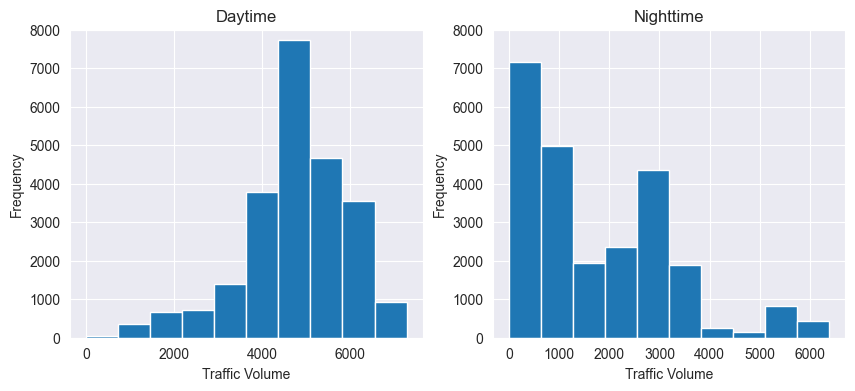

In [7]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(traffic_day['traffic_volume'])
plt.title('Daytime')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.ylim(0,8000)

plt.subplot(1, 2, 2)
plt.hist(traffic_night['traffic_volume'])
plt.title('Nighttime')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.ylim(0,8000)

plt.show()

In [8]:
traffic_day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
traffic_night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The daytime traffic histogram is skewed left, indicating that there is very high traffic volume during the daytime. Statistical review of daytime traffic data also shows that the spread between the 1st to 3rd quartiles are close and traffic volume is high throughout the dataset.

On the other hand, the nighttime traffic histogram skews right, indicating that traffic volumes are on the lower end during the nighttime. The traffic volume at the 75th percentile of nighttime traffic data is significantly smaller than the traffic volume in daytime 25th percentile.

The data therefore indicates that time of day affects traffic volumes with higher volumes occurring in the daytime (between 7AM and 7PM) and significantly lower volumes occurring in the nighttime (between 7PM and 7AM).

### Time Indicators
Since our goal is to determine indicators of heavy traffic, we will be focusing on daytime traffic data going forward.

We have determined that time is a possible indicator of heavy traffic. We will consider how traffic volume changes according to month, day of the week and time of day.

In [10]:
traffic_day['month'] = traffic_day['date_time'].dt.month
by_month = traffic_day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

<AxesSubplot: xlabel='month'>

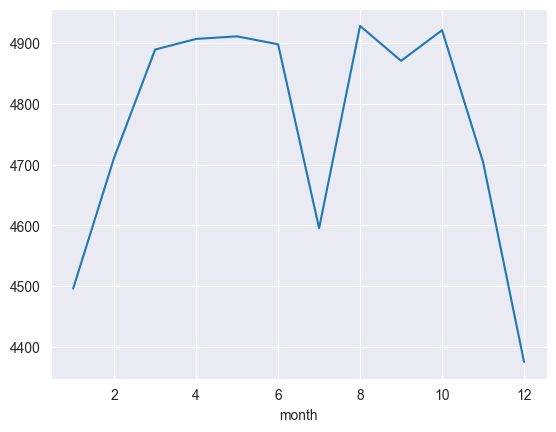

In [11]:
by_month['traffic_volume'].plot()

Traffic volumes climb exponentially from the month of January and peak in March. They remain at peak levels until July when volumes drop significantly. They peak back up in August and generally remain at peak levels until they drop significantly in December.

This indicates that traffic volumes remain high except during the summer and winter holiday months.

We will now review traffic volumes by day of the week.

In [12]:
traffic_day['dayofweek'] = traffic_day['date_time'].dt.dayofweek
by_dayofweek = traffic_day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

# 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

<AxesSubplot: xlabel='dayofweek'>

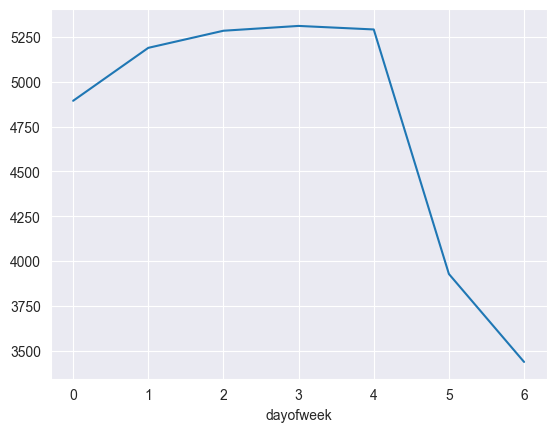

In [13]:
by_dayofweek['traffic_volume'].plot()

Traffic volumes are high on weekdays and significantly lower on weekends.

We will now review traffic volumes per time of day.

In [14]:
traffic_day['hour'] = traffic_day['date_time'].dt.hour
weekday = traffic_day.loc[traffic_day['dayofweek'] <= 4] # 4 == Friday
weekend = traffic_day.loc[traffic_day['dayofweek'] >= 5] # 5 == Saturday
by_hour_weekday = weekday.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_weekday['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


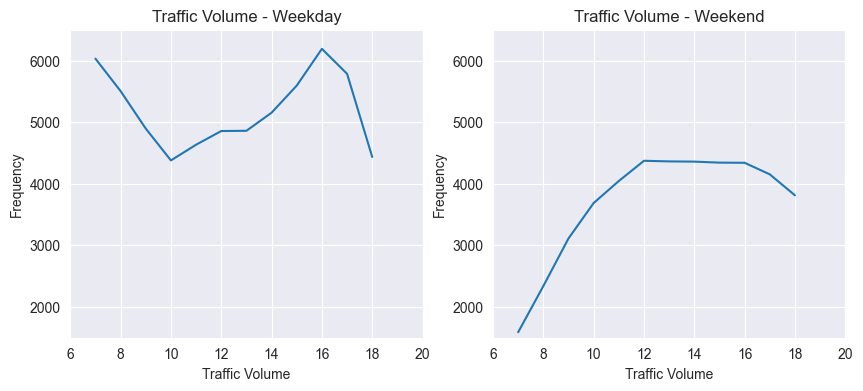

In [15]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(by_hour_weekday['traffic_volume'])
plt.title('Traffic Volume - Weekday')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.ylim(1500,6500)
plt.xlim(6,20)

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic Volume - Weekend')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.ylim(1500,6500)
plt.xlim(6,20)

plt.show()

On weekdays, traffic peak times reflect rush hour times (7-8AM and 4-6PM). On weekends, traffic volumes peak around noon and remain at peak until around 4PM when they begin to drop.

### Time Indicators - Conclusion
Time is a definite indicator of heavy traffic:
* Traffic volumes during the daytime are higher than nighttime traffic.
* Traffic volumes drop significantly during the holiday months.
* Traffic volumes are significantly lower during the weekends.
* Traffic volumes are highest during weekday rush hour and on weekends, they peak around noon.
These patterns reflect that human work and social behaviours around time affect traffic volumes.

### Weather Indicators

We will find the correlation values between traffic volume and the numerical weather columns.

In [17]:
traffic_day[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']].corr()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
traffic_volume,1.000000,0.128317,0.003697,0.001265,-0.032932
temp,0.128317,1.000000,0.010815,-0.019286,-0.135519
rain_1h,0.003697,0.010815,1.000000,-0.000091,0.004993
snow_1h,0.001265,-0.019286,-0.000091,1.000000,0.027721
clouds_all,-0.032932,-0.135519,0.004993,0.027721,1.000000


There is no strong correlation between traffic volumes and the weather columns. We will now consider the categorical weather columns. We will calculate and plot the average traffic volume associates with each unique value in these columns.

In [18]:
by_weather_main = traffic_day.groupby('weather_main').mean()
by_weather_description = traffic_day.groupby('weather_description').mean()

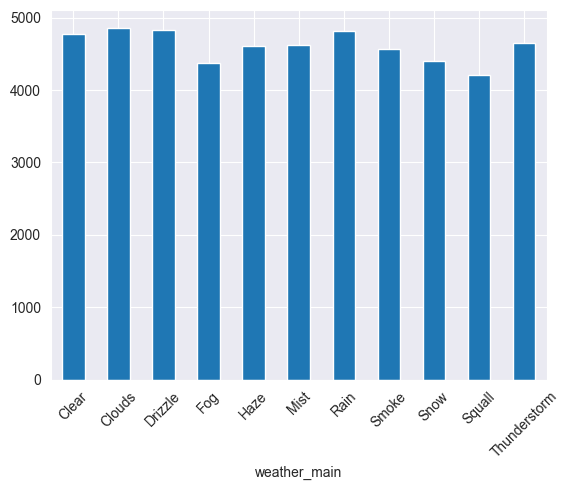

In [22]:
by_weather_main['traffic_volume'].plot.bar()
plt.xticks(rotation=45)
plt.show()

During weather conditions, daytime traffic conditions never reach the 75th percentile (5.5k). The various weather conditions only slightly affect traffic volumes. However, volumes are highest during clear weather, cloudy weather, drizzles, rain and thunderstorms.

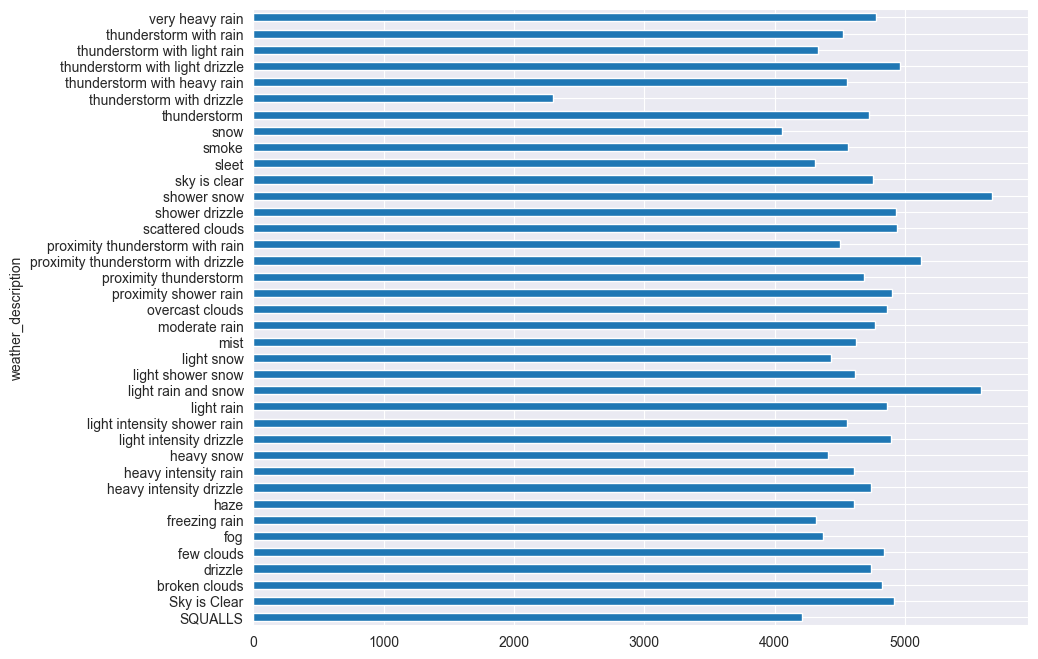

In [23]:
by_weather_description['traffic_volume'].plot.barh(figsize=(10,8))
plt.show()

From the weather description chart, we clearly see that 2 major weather conditions drive increased traffic volumes: shower snow and light rain and snow. Thunderstorm with drizzle have the lowest traffic volumes.

### Conclusion
Time and weather are indicators of heavy traffic. Rush hour, weekdays and non-holiday months have the heaviest volumes, and weather conditions like light snow and rain have the heaviest volumes.

### Next Steps
* Use the nighttime data to look for heavy traffic indicators.
* Find more time and weather indicators.